<a href="https://colab.research.google.com/github/vgordon93/Introduction-to-deep-learning-Assignment1/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Introduction to Deep Learning

### Amit Moses 312614324
### Vladimir Gordon 312736481

# Assignment 1. Music Century Classification

**Deadline**: Sunday, April 4th, by 9pm.

**Submission**: Submit a PDF export of the completed notebook as well as the ipynb file. 



In this assignment, we will build models to predict which
**century** a piece of music was released.  We will be using the "YearPredictionMSD Data Set"
based on the Million Song Dataset. The data is available to download from the UCI 
Machine Learning Repository. Here are some links about the data:

- https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd
- http://millionsongdataset.com/pages/tasks-demos/#yearrecognition

Note that you are note allowed to import additional packages **(especially not PyTorch)**. One of the objectives is to understand how the training procedure actually operates, before working with PyTorch's autograd engine which does it all for us.


## Question 1. Data (21%)

Start by setting up a Google Colab notebook in which to do your work.
Since you are working with a partner, you might find this link helpful:

- https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb

The recommended way to work together is pair coding, where you and your partner are sitting together and writing code together. 

To process and read the data, we use the popular `pandas` package for data analysis.

In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now that your notebook is set up, we can load the data into the notebook. The code below provides
two ways of loading the data: directly from the internet, or through mounting Google Drive.
The first method is easier but slower, and the second method is a bit involved at first, but
can save you time later on. You will need to mount Google Drive for later assignments, so we recommend
figuring how to do that now.

Here are some resources to help you get started:

- http.://colab.research.google.com/notebooks/io.ipynb

In [ ]:
load_from_drive = False

if not load_from_drive:
  csv_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip"
else:
  from google.colab import drive
  drive.mount('/content/gdrive')
  csv_path = '/content/gdrive/My Drive/YearPredictionMSD.txt.zip' # TODO - UPDATE ME WITH THE TRUE PATH!

t_label = ["year"]
x_labels = ["var%d" % i for i in range(1, 91)]
df = pandas.read_csv(csv_path, names=t_label + x_labels)

Now that the data is loaded to your Colab notebook, you should be able to display the Pandas
DataFrame `df` as a table:

In [ ]:
df

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,...,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,var69,var70,var71,var72,var73,var74,var75,var76,var77,var78,var79,var80,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,1,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,...,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,...,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,1,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,...,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,1,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,...,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,1,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,...,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362,-2.46595,-4.05003,-56.51161,-34

To set up our data for classification, we'll use the "year" field to represent
whether a song was released in the 20-th century. In our case `df["year"]` will be 1 if
the year was released after 2000, and 0 otherwise.

In [ ]:
df["year"] = df["year"].map(lambda x: int(x > 2000))

In [ ]:
df.head(20)

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,...,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,var69,var70,var71,var72,var73,var74,var75,var76,var77,var78,var79,var80,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,1,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,...,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,...,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,1,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,...,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,1,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,...,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,1,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,...,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362,-2.46595,-4.05003,-56.51161,-34

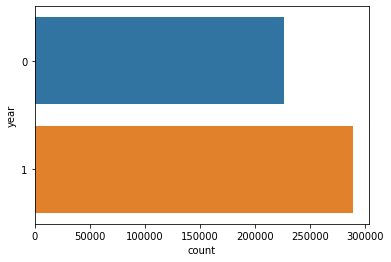

In [ ]:
sns.countplot(y="year", data=df);

### Part (a) -- 7%

The data set description text asks us to respect the below train/test split to
avoid the "producer effect". That is, we want to make sure that no song from a single artist
ends up in both the training and test set.

Explain why it would be problematic to have
some songs from an artist in the training set, and other songs from the same artist in the
test set. (Hint: Remember that we want our test accuracy to predict how well the model
will perform in practice on a song it hasn't learned about.)

In [ ]:
df_train = df[:463715]
df_test = df[463715:]

# convert to numpy
train_xs = df_train[x_labels].to_numpy()
train_ts = df_train[t_label].to_numpy()
test_xs = df_test[x_labels].to_numpy()
test_ts = df_test[t_label].to_numpy()

# Write your explanation here
'''
Answer:
Our goal when creating a trainig set is to create it versatile as much we can.
The reason for this is to let our model study different cases and different variables.
The seperation is critical since the sole artist will probably have similar recognizable patterns in the fetures,
outcomes with perfect prediction of the class, since the model will start "memorizing" data, and thus, will effect the score of the model.
In the other hand, for unknown artist, it may predict poorly. Therefore, it indicates on good score, while this score is irrelevant.
'''

### Part (b) -- 7%

It can be beneficial to **normalize** the columns, so that each column (feature)
has the *same* mean and standard deviation.

In [ ]:
feature_means = df_train.mean()[1:].to_numpy() # the [1:] removes the mean of the "year" field
feature_stds  = df_train.std()[1:].to_numpy()

train_norm_xs = (train_xs - feature_means) / feature_stds
test_norm_xs = (test_xs - feature_means) / feature_stds

Notice how in our code, we normalized the test set using the *training data means and standard deviations*.
This is *not* a bug.

Explain why it would be improper to compute and use test set means
and standard deviations. (Hint: Remember what we want to use the test accuracy to measure.)

In [ ]:
# Write your explanation here
'''
Answer: Test set is the "simulation data" for our model, for evaluation reasons of the model.
Test set and Traning set may have different mean and standart deviation value.
So, it may create error. You can't evalute the model based on different values. This will be improper.
Other way to look at this is that normalization of the Trainig set is important so all the features
will have the same impact on the netwotk in the training phase - it is equivalent to multiply each feature with a Weight. 
So, each Weight should be applied to each feature in the Test set too. 
Normalizing the Test set using the Test data mean and standard deviations will cause different Weights.
'''

### Part (c) -- 7%

Finally, we'll move some of the data in our training set into a validation set.

Explain why we should limit how many times we use the test set, and that we should use the validation
set during the model building process.

In [ ]:
# shuffle the training set
reindex = np.random.permutation(len(train_xs))
train_xs = train_xs[reindex]
train_norm_xs = train_norm_xs[reindex]
train_ts = train_ts[reindex]

# use the first 50000 elements of `train_xs` as the validation set
train_xs, val_xs           = train_xs[50000:], train_xs[:50000]
train_norm_xs, val_norm_xs = train_norm_xs[50000:], train_norm_xs[:50000]
train_ts, val_ts           = train_ts[50000:], train_ts[:50000]

# Write your explanation here
'''
Answer: 
It's important to limit the times of usage if the test set, 
because the test set used to provide an unbiased evaluation of the final model, 
while the validation set used to provide evaluation of a model while tuning model parameters.
In this example, validation set shuffled, meaning the validation set may change,
and this means that the data within may change, effecting the model in a different way.
'''

## Part 2. Classification (79%)

We will first build a *classification* model to perform decade classification.
These helper functions are written for you. All other code that you write in this section should be vectorized whenever possible (i.e., avoid unnecessary loops).

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
    
def cross_entropy(t, y):
  return -t * np.log(y + 1e-30) - (1 - t) * np.log(1 - y + 1e-30)

def cost(y, t):
  return np.mean(cross_entropy(t, y))

def get_accuracy(y, t):
  acc = 0
  N = 0
  for i in range(len(y)):
    N += 1
    if (y[i] >= 0.5 and t[i] == 1) or (y[i] < 0.5 and t[i] == 0):
      acc += 1
  return acc / N

### Part (a) -- 7%

Write a function `pred` that computes the prediction `y` based on logistic regression, i.e., a single layer with weights `w` and bias `b`. The output is given by: 
\begin{equation}
y = \sigma({\bf w}^T {\bf x} + b),
\end{equation}
where the value of $y$ is an estimate of the probability that the song is released in the current century, namely ${\rm year} =1$.

In [ ]:
def pred(w, b, X):
  """
  Returns the prediction `y` of the target based on the weights `w` and scalar bias `b`.

  Preconditions: np.shape(w) == (90,)
                 type(b) == float
                 np.shape(X) = (N, 90) for some N

  >>> pred(np.zeros(90), 1, np.ones([2, 90]))
  array([0.73105858, 0.73105858]) # It's okay if your output differs in the last decimals
  """
  # Your code goes here 
  if np.shape(w)!=(90,):
    w = np.zeros(90) # TODO - change the functiolnality
  b = float(b)
  f = X @ w + b # @ is dot multiplication
  return sigmoid(f)  

### Part (b) -- 7%

Write a function `derivative_cost` that computes and returns the gradients 
$\frac{\partial\mathcal{L}}{\partial {\bf w}}$ and
$\frac{\partial\mathcal{L}}{\partial b}$. Here, `X` is the input, `y` is the prediction, and `t` is the true label.




In [ ]:
# Vova
def derivative_cost(X, y, t):
  """
  Returns a tuple containing the gradients dLdw and dLdb.

  Precondition: np.shape(X) == (N, 90) for some N
                np.shape(y) == (N,)
                np.shape(t) == (N,)

  Postcondition: np.shape(dLdw) = (90,)
           type(dLdb) = float
  """
  # Your code goes here
  dLdw = (X.T@(y-t))/np.shape(y)[0]
  dLdb = np.mean(y-t)
  return (dLdw, dLdb)

# **Explenation on Gradients**




**Add here an explaination on how the gradients are computed**:

Write your explanation here. Use Latex to write mathematical expressions. [Here is a brief tutorial on latex for notebooks.](https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/)
https://en.wikipedia.org/wiki/Wikipedia:LaTeX_symbols

The loss function:
$$
\mathcal{L} = \frac{1}{N} \sum_{n=1}^{N} H(y,t)
$$
and $H(y,t)$ defined as:
$$H(y,t) = -t * log(y) - (1 - t) * log(1 - y)$$
$y$ defined as:
$$y = \sigma({\bf w}^T {\bf x} + b)$$
Let's define $z$ as:
$$z\triangleq {\bf w}^T {\bf x} + b$$
Since $y$ consist of a sigmoid function:
$$\sigma(z) = \frac{1}{1+e^{-z}}$$


The gradient of the loss function
$\frac{\partial\mathcal{L}}{\partial {\bf w}}$:
$$
\frac{dL}{dw} = \frac{1}{N} \sum_{n=1}^{N} [-t * log(y) - (1 - t) * log(1 - y)] = \frac{d}{dw} \frac{1}{N} \sum_{n=1}^{N} [-t * log(y) - (1 - t) * log(1 - y)] = \frac{1}{N} \sum_{n=1}^{N} \frac{d}{dw}[-t * log(y) - (1 - t) * log(1 - y)] = \frac{1}{N} \sum_{n=1}^{N}[-t\frac{d}{dw}log(y) + (1 - t) \frac{d}{dw}log(1 - y)]
$$

Now, let's derivate $-t\frac{d}{dw}log(y)$:

$$
-t\frac{d}{dw}log(y)= -t\frac{d}{dw}log( \sigma({\bf w}^T {\bf x} + b)) = -t\frac{d}{dw}log( \frac{1}{1+e^{-{\bf w}^T {\bf x} - b}}) = t\frac{d}{dw}log( 1+e^{-{\bf w}^T {\bf x} - b}) = 
t\frac{1}{1+e^{-{\bf w}^T {\bf x} - b}}\frac{d}{dw}(1+e^{-{\bf w}^T {\bf x} - b}) = 
t\frac{1}{1+e^{-{\bf w}^T {\bf x} - b}}e^{-{\bf w}^T {\bf x} - b}\frac{d}{dw}({-{\bf w}^T {\bf x} - b}) = 
\frac{te^{-{\bf w}^T {\bf x} - b}}{1+e^{-{\bf w}^T {\bf x} - b}}({-{x}}) = 
-t(1-\frac{1}{1+e^{-{\bf w}^T {\bf x} - b}})x = -t(1-y)x
$$
So:
$$
-t\frac{d}{dw}log(y)=-t(1-y)x
$$

Now, let's derivate $(1 - t) \frac{d}{dw}log(1 - y)$:
$$
(1 - t) \frac{d}{dw}log(1 - y)=
(1 - t) \frac{d}{dw}log(1 - \frac{1}{1+e^{-({\bf w}^T {\bf x} + b)}})=
(1 - t) \frac{1}{1- \frac{1}{1+e^{-({\bf w}^T {\bf x} + b)}}} \frac{d}{dw}(1 - \frac{1}{1+e^{-({\bf w}^T {\bf x} + b)}})
$$

To calculate $\frac{d}{dw} \frac{1}{1+e^{-({\bf w}^T {\bf x} + b)}}$:
$$
\frac{d}{dw}\frac{1}{1+e^{-({\bf w}^T {\bf x} + b)}} 
= \frac{d}{dw}({1+e^{-({\bf w}^T {\bf x} + b)})^{-1}} 
= -({1+e^{-({\bf w}^T {\bf x} + b)}})^{-2} \cdot \frac{d}{dw} ({1+e^{-({\bf w}^T {\bf x} + b)}}) 
= \frac{xe^{-({\bf w}^T {\bf x} + b)}}{ ({1+e^{-({\bf w}^T {\bf x} + b)}})^2} 
= \frac{x(-1+1+e^{-({\bf w}^T {\bf x} + b)})}{ ({1+e^{-({\bf w}^T {\bf x} + b)}})^2} 
= x \cdot \sigma({\bf w}^T {\bf x}+b)[1-\sigma({\bf w}^T {\bf x}+b)] 
= xy(1-y)
$$

So:
$$
(1 - t) \frac{d}{dw}log(1 - y)=
(1 - t) \frac{1}{1- \frac{1}{1+e^{-({\bf w}^T {\bf x} + b)}}} \frac{d}{dw}(1 - \frac{1}{1+e^{-({\bf w}^T {\bf x} + b)}}) =
(1-t)\frac{1-y}{1-y}xy = 
(1-t)xy
$$

Therefore:
$$
\frac{dL}{dw} =  \frac{1}{N}[-t(1-y)x + (1-t)xy] = \frac{1}{N} [-tx+tyx+xy-txy] = \frac{1}{N}[-tx+xy] = \frac{1}{N}x(y-t)
$$


The gradient of the loss function
$\frac{\partial\mathcal{L}}{\partial {\bf b}}$, in the same principle, so let's derivate $-t\frac{d}{db}log(y)$:

$$
-t\frac{d}{db}log(y)= -t\frac{d}{db}log( \sigma({\bf w}^T {\bf x} + b)) = -t\frac{d}{db}log( \frac{1}{1+e^{-{\bf w}^T {\bf x} - b}}) = t\frac{d}{db}log( 1+e^{-{\bf w}^T {\bf x} - b}) = 
t\frac{1}{1+e^{-{\bf w}^T {\bf x} - b}}\frac{d}{db}(1+e^{-{\bf w}^T {\bf x} - b}) = 
t\frac{1}{1+e^{-{\bf w}^T {\bf x} - b}}e^{-{\bf w}^T {\bf x} - b}\frac{d}{db}({-{\bf w}^T {\bf x} - b}) = 
\frac{te^{-{\bf w}^T {\bf x} - b}}{1+e^{-{\bf w}^T {\bf x} - b}}({-{1}}) = 
-t(1-\frac{1}{1+e^{-{\bf w}^T {\bf x} - b}}) = -t(1-y) = t(y-1)
$$

Now, let's derivate $(1 - t) \frac{d}{db}log(1 - y)$:
$$
(1 - t) \frac{d}{db}log(1 - y)=
(1 - t) \frac{d}{db}log(1 - \frac{1}{1+e^{-({\bf w}^T {\bf x} + b)}})=
(1 - t) \frac{1}{1- \frac{1}{1+e^{-({\bf w}^T {\bf x} + b)}}} \frac{d}{db}(1 - \frac{1}{1+e^{-({\bf w}^T {\bf x} + b)}})
$$

To calculate $\frac{d}{dwb} \frac{1}{1+e^{-({\bf w}^T {\bf x} + b)}}$:
$$
= \frac{d}{db}({1+e^{-({\bf w}^T {\bf x} + b)})^{-1}} 
= -({1+e^{-({\bf w}^T {\bf x} + b)}})^{-2}\frac{d}{db} ({1+e^{-({\bf w}^T {\bf x} + b)}}) 
= \frac{e^{-({\bf w}^T {\bf x} + b)}}{ ({1+e^{-({\bf w}^T {\bf x} + b)}})^2} 
= \frac{-1+1+e^{-({\bf w}^T {\bf x} + b)}}{ ({1+e^{-({\bf w}^T {\bf x} + b)}})^2} 
= \sigma({\bf w}^T {\bf x}+b)[1-\sigma({\bf w}^T {\bf x}+b)] 
= y(1-y)
$$


So:
$$
(1 - t) \frac{d}{db}log(1 - y) =
(1 - t) \frac{1}{1- \frac{1}{1+e^{-({\bf w}^T {\bf x} + b)}}} \frac{d}{db}(1 - \frac{1}{1+e^{-({\bf w}^T {\bf x} + b)}}) = (1-t)\frac{1-y}{1-y}(-y) = (t-1)y
$$


Therefore:
$$
\frac{dL}{db} = \frac{1}{N} \sum_{n=1}^{N} [t(y-1)-(t-1)y] = 
\frac{1}{N} \sum_{n=1}^{N} [ty -t - ty + y] = 
\frac{1}{N} \sum_{n=1}^{N} [y-t]
$$

### Part (c) -- 7%

We can check that our derivative is implemented correctly using the finite difference rule. In 1D, the
finite difference rule tells us that for small $h$, we should have

$$\frac{f(x+h) - f(x)}{h} \approx f'(x)$$

Show that $\frac{\partial\mathcal{L}}{\partial b}$  is implement correctly
by comparing the result from `derivative_cost` with the empirical cost derivative computed using the above numerical approximation.


In [ ]:
# Your code goes here

'''
r1 = ...
r2 = ...
print("The analytical results is -", r1)
print("The algorithm results is - ", r2)
'''

# Parameters
h = 0.0001
x = np.random.randn(1,90)
w = np.zeros(90,)
b = 0
yy = pred(w,b,x)
tt = np.zeros(1)


r1 = derivative_cost(x, yy, tt)
L = cost(pred(w, b, x), tt)
L_h = cost(pred(w, b+h, x), tt)
r2 = (L_h - L) / h
print("The analytical results is -", r1[1])
print("The algorithm results is - ", r2)

The analytical results is - 0.5
The algorithm results is -  0.5000125000009792


### Part (d) -- 7%

Show that $\frac{\partial\mathcal{L}}{\partial {\bf w}}$  is implement correctly.

In [ ]:
# Your code goes here. You might find this below code helpful: but it's
# up to you to figure out how/why, and how to modify the code

'''
r1 = ...
r2 = ...
print("The analytical results is -", r1)
print("The algorithm results is - ", r2)
'''

# Parameters
''' Same parameters from (c) '''

r1 = derivative_cost(x, yy, tt)
r2 = np.zeros(90,)

for i in range (0, 90):
  h_i = np.zeros(90,)
  h_i[i] = h
  L = cost(pred(w, b, x), tt)
  L_h = cost(pred(w + h_i, b, x), tt)
  r2[i,] = (L_h - L) / h


print("The analytical results is -", r1[0])
print("The algorithm results is - ", r2)

The analytical results is - [-0.78971402 -0.69496745 -0.56474267 -0.41975221  0.71890818 -0.65042157
 -0.31412632  0.31523097 -0.44405119  1.32425402  0.19228957 -1.29947123
  0.68001227 -0.23018085 -0.62014546  0.08495674  0.20559117  0.28843452
 -0.45668896 -0.53930218 -0.29321848 -0.70192325 -0.28247781  0.45367609
  0.20825805  0.44485014 -0.34317127 -1.05494071 -0.60873208 -0.68155272
  0.27144286  0.34008606 -0.56155446 -0.74430716 -0.5190363  -0.48236845
  0.34282392 -0.31409985 -0.44785852 -0.34929071  0.21600445  0.34420671
  0.02558874  0.75439112  0.46013943 -0.46538159  0.10995521 -0.35650224
 -0.72350764  0.13477856  0.32862325 -1.29113574 -0.86578107 -0.2751956
  0.0283088  -0.79403969  0.15449433 -0.52289003 -0.25740942  0.25227907
 -0.81481032  0.00814862 -0.66476423 -0.39861494 -0.02220064 -0.87849933
 -1.19751039  0.03894978 -0.50795995  0.3535717  -0.55979153 -0.98091295
 -0.14772114 -0.17792988 -0.34727354  0.87799884 -0.47143183 -0.66312
  0.12841592  0.21153415 -0

### Part (e) -- 7%

Now that you have a gradient function that works, we can actually run gradient descent. 
Complete the following code that will run stochastic: gradient descent training:

In [ ]:
def run_gradient_descent(train_norm_xs,train_ts,val_norm_xs,val_ts, w0, b0, mu, batch_size, max_iters=100):
  """Return the values of (w, b) after running gradient descent for max_iters.
  We use:
    - train_norm_xs and train_ts as the training set
    - val_norm_xs and val_ts as the test set
    - mu as the learning rate
    - (w0, b0) as the initial values of (w, b)

  Precondition: np.shape(w0) == (90,)
                type(b0) == float
 
  Postcondition: np.shape(w) == (90,)
                 type(b) == float
  """
  w = w0
  b = b0
  iter = 0
  iter_disp_ratio = 10
  val_acc_end = np.zeros(int(max_iters/iter_disp_ratio),)


  while iter < max_iters:
    # shuffle the training set (there is code above for how to do this)
    reindex = np.random.permutation(len(train_norm_xs))
    train_norm_xs = train_norm_xs[reindex]
    train_ts = train_ts[reindex]

    for i in range(0, len(train_norm_xs), batch_size): # iterate over each minibatch
      # minibatch that we are working with:
      X = train_norm_xs[i:(i + batch_size)]
      t = train_ts[i:(i + batch_size), 0]

      # since len(train_norm_xs) does not divide batch_size evenly, we will skip over
      # the "last" minibatch
      if np.shape(X)[0] != batch_size:
        continue

      # compute the prediction
      yy = pred(w, b, X)
      dL = derivative_cost(X, yy, t)

      # update w and b
      w = w - mu*dL[0]
      b = b - mu*dL[1]

      # increment the iteration count
      iter += 1

      # compute and print the *validation* loss and accuracy
      if (iter % iter_disp_ratio == 0):
        y_val = pred(w, b, val_norm_xs)
        val_cost = cost(y_val, val_ts.transpose() )
        val_acc = get_accuracy(y_val, val_ts)
        print("Iter %d. [Val Acc %.0f%%, Loss %f]" % (
               iter, val_acc * 100, val_cost))
        # print(iter/iter_disp_ratio)
        val_acc_end[int(iter/iter_disp_ratio) - 1] = val_acc

      if iter >= max_iters:
        break

      # Think what parameters you should return for further use
      
  return w, b, val_acc_end

### Part (f) -- 7%

Call `run_gradient_descent` with the weights and biases all initialized to zero.
Show that if the learning rate $\mu$ is too small, then convergence is slow.
Also, show that if $\mu$ is too large, then the optimization algorirthm does not converge. The demonstration should be made using plots showing these effects.

In [ ]:
## mu
w0 = np.zeros(90)
b0 = np.zeros(1)

# Write your code here
val_acc_mu = np.zeros([3,100])
w_new, b_new, val_acc_mu[0,] = run_gradient_descent(train_norm_xs,train_ts,val_norm_xs,val_ts, w0, b0, mu=0.01, batch_size=100, max_iters=1000)
w_new, b_new, val_acc_mu[1,] = run_gradient_descent(train_norm_xs,train_ts,val_norm_xs,val_ts, w0, b0, mu=0.1, batch_size=100, max_iters=1000)
w_new, b_new, val_acc_mu[2,] = run_gradient_descent(train_norm_xs,train_ts,val_norm_xs,val_ts, w0, b0, mu=1, batch_size=100, max_iters=1000)
print(val_acc_mu)


<function matplotlib.pyplot.show>

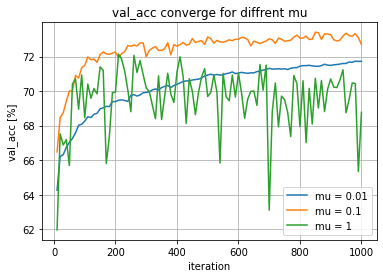

In [ ]:
xx = np.arange(10,1010,10)
plt.plot(xx, val_acc_mu[0,] * 100)
plt.plot(xx, val_acc_mu[1,] * 100)
plt.plot(xx, val_acc_mu[2,] * 100)
plt.legend(['mu = 0.01','mu = 0.1','mu = 1'])
plt.grid()
plt.title('val_acc converge for diffrent mu')
plt.xlabel('iteration')
plt.ylabel('val_acc [%]')
plt.show

**Explain and discuss your results here:**

As we can see in the plot above, $\mu$ too small ( = 0.01) cause slow converge. In addition, for large $\mu$ ( = 1) the optimization algorirthm does not converge.

The reason for the first claim is that $\mu$ represent the step size, and for small step size, the "path" through the minimum is longer. We can see that the blue ($\mu$=0.01) graph follow the orange curve ($\mu$=0.1, with the proper choice of $\mu$) tendency.
The reson for the second term is that the step size is too large, and the algorithm skips the minimun at each epoch. Therefore, the green graph will never converge and always be unstable.

### Part (g) -- 7%

Find the optimial value of ${\bf w}$ and $b$ using your code. Explain how you chose
the learning rate $\mu$ and the batch size. Show plots demostrating good and bad behaviours.

In [ ]:
w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]

# Write your code here

## batch-size comparison

import time
val_acc_bs = np.zeros([5,100])
runtime = np.zeros([5,])

for i in range (0,5):
  print (i)
  start_time = time.time()
  w_new, b_new, val_acc_bs[i,] = run_gradient_descent(train_norm_xs,train_ts,val_norm_xs,val_ts, w0, b0, mu=0.1, batch_size=10**i, max_iters=1000)
  runtime[i,] = (time.time() - start_time)


<function matplotlib.pyplot.show>

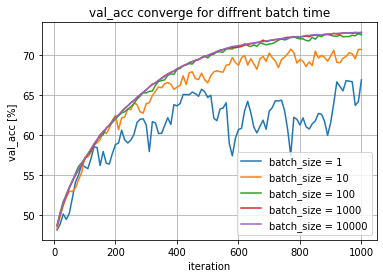

In [ ]:
# Plot val_acc converge
xx = np.arange(10,1010,10)
plt.plot(xx, val_acc_bs[0,] * 100)
plt.plot(xx, val_acc_bs[1,] * 100)
plt.plot(xx, val_acc_bs[2,] * 100)
plt.plot(xx, val_acc_bs[3,] * 100)
plt.plot(xx, val_acc_bs[4,] * 100)
plt.legend(['batch_size = 1','batch_size = 10','batch_size = 100','batch_size = 1000','batch_size = 10000'])
plt.grid()
plt.title('val_acc converge for diffrent batch time')
plt.xlabel('iteration')
plt.ylabel('val_acc [%]')
plt.show

Run time for batch_size = 1: 15.17621922492981 sec
Run time for batch_size = 10: 15.21213150024414 sec
Run time for batch_size = 100: 15.023170471191406 sec
Run time for batch_size = 1000: 15.686829090118408 sec
Run time for batch_size = 10000: 21.665571212768555 sec


Text(0, 0.5, 'run-time [sec]')

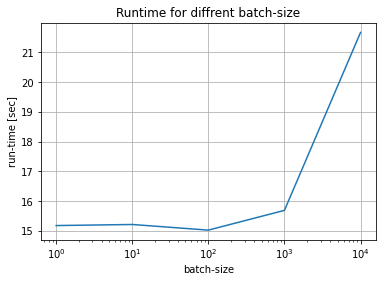

In [ ]:
# Plot runtime
for i in range(0,5):
  print("Run time for batch_size = {}: {} sec".format(10**i,runtime[i,]))
    
plt.plot([1, 10, 100, 1000, 10000], runtime)
plt.xscale("log")
plt.grid()
plt.title('Runtime for diffrent batch-size')
plt.xlabel('batch-size')
plt.ylabel('run-time [sec]')

In [ ]:
## optimial value of  w  and  b
w_new, b_new, val_acc = run_gradient_descent(train_norm_xs,train_ts,val_norm_xs,val_ts, w0, b0, mu=0.1, batch_size=100, max_iters=1000)
print(" b = %f" %(b_new) )
print(" w = {}".format(w_new))


**Explain and discuss your results here:**

We discussed in the previous section on the consideration of choosing the step size ($\mu$).
The graph in the previous section show various results (good and bad) behavior of the model according to $\mu$ selection. Good behavior equivalent to fast converges, like in the orange curve ($\mu = 0.1$) in the "val_acc converge for diffrent mu" graph. Bad behavior equivalent to no conerges at all, like in the green curve in the same graph.

For choosing the right batch size, we run the algorithm for diffrent values and we look at two characteristics: 
1. Validation accuracy:
  
  As we can see in the "Validation accuracy to iteration" graph, small batch size cause slow and noisy/unstable converge - Bad behavior.
  
  From $batch-size = 100$ and above, all the batch-sizes have similar behavior.
2. Converge time

  From the run-time plot the minimun is at $batch-size = 100$. If it is too small, the algoritm will have to do more for loops, so the run time is a little bit slower. If the batch size is too large, the SGD will be signifly more complex, that will cause long run time.

Therefore, from the explnations above, the optimal results will outcome with those chosen values:

$$\mu = 0.1 $$
$$Batch - size = 100$$

### Part (h) -- 15%

Using the values of `w` and `b` from part (g), compute your training accuracy, validation accuracy,
and test accuracy. Are there any differences between those three values? If so, why?

In [ ]:
# Write your code here
train_ys = pred(w_new, b_new, train_norm_xs)
val_ys = pred(w_new, b_new, val_norm_xs)
test_ys = pred(w_new, b_new, test_norm_xs)

train_acc = get_accuracy(train_ys, train_ts)
val_acc = get_accuracy(val_ys, val_ts)
test_acc = get_accuracy(test_ys, test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)


train_acc =  0.7183036631497528  val_acc =  0.71988  test_acc =  0.7129382142165408


**Explain and discuss your results here:**

Those three values are different parameters since the calculation of the accuracy is based on different part of the dataset.
The difference between those three values, based on the pourpose of each dataset.
- The test accuracy used for final model evaluation - how good the model can handle "new" data.

- The train accuracy is the accuracy that calculated on the data set that used for the fitting of the model. This accuracy indicates how well the model handles the data it was trained on.
If the training accuracy is subjectively far higher than test accuracy, this indicates on over-fitting of the model.

- The validation accuracy is the accuracy that calculated on the data set that not used for training of the model, but used during the training process for validating the generalisation ability of the model.
This accuracy is importent during the model's parameters optimization.

The results of the model:
Although the received  accuracy of 71% is not so good result,
the results are almost similar, with a difference of less than 1%.
This means that the data was balanced well, and the model is general as it can be.

Since the results of the SKlrean API (in the next section) of this exact method (Logistic regression) outcome with almost similar results, there is not much to do to improve the results of this model. 
Changing the classification method may outcome with better accuracy result.



### Part (i) -- 15%

Writing a classifier like this is instructive, and helps you understand what happens when
we train a model. However, in practice, we rarely write model building and training code
from scratch. Instead, we typically use one of the well-tested libraries available in a package.

Use `sklearn.linear_model.LogisticRegression` to build a linear classifier, and make predictions about the test set. Start by reading the
[API documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Compute the training, validation and test accuracy of this model.

In [ ]:
from sklearn.linear_model import LogisticRegression;

model = LogisticRegression(random_state=0).fit(train_norm_xs, train_ts);

train_acc = model.score(train_norm_xs, train_ts);
val_acc = model.score(val_norm_xs, val_ts);
test_acc = model.score(test_norm_xs, test_ts);

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_acc =  0.7325888594805603  val_acc =  0.73446  test_acc =  0.7267286461359674


**This parts helps by checking if the code worked.**
**Check if you get similar results, if not repair your code**


In [ ]:
# This part used to save this notebook as PDF.
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!jupyter nbconvert --to pdf Assignment1.ipynb

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-generic-recommended is already the newest version (2017.20180305-1).
texlive-xetex is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
[NbConvertApp] Converting notebook Assignment1.ipynb to pdf
[NbConvertApp] Support files will be in Assignment1_files/
[NbConvertApp] Making directory ./Assignment1_files
[NbConvertApp] Making directory ./Assignment1_files
[NbConvertApp] Making directory ./Assignment1_files
[NbConvertApp] Making directory ./Assignment1_files
[NbConvertApp] Writing 113168 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbC